## step 0. 머신러닝 프로젝트의 큰 틀

< 머신러닝 프로젝트의 큰 틀 >
1. 모델의 목적 살펴보기, 큰 그림 그리기

2. 사용 데이터 구하기

3. 데이터에 대해 살펴보기 (EDA)

4. 데이터 전처리하기 (알고리즘을 위한 데이터 처리)

5. 모델 선택 및 Train

6. 초기 모델을 발전시키며 모델 수정

7. 솔루션 제시 및 유지 보수

##Step 1. 목적 살펴보기, 큰그림 그리기

주제 : 뉴욕에서 방이 둘 딸린 집을 에어비엔비에 내놓으려 한다.
 이 때 적당한 숙박료를 구하시오.

----------
데이터 소개 : New York City Airbnb Open Data

    - 각 파일의 컬럼은 아래와 같습니다.
    id: 항목의 ID
    name: 항목의 이름 (타이틀)
    host_id: 호스트 ID
    host_name: 호스트의 이름
    neighbourhood_group: 방이 있는 구역 그룹
    neighbourhood: 방이 있는 구역
    latitude: 방이 위치한 위도
    longitude: 방이 위치한 경도
    room_type: 방의 종류
    price: 가격 (미 달러)
    minimum_nights: 최소 숙박 일수
    number_of_reviews: 리뷰의 개수
    last_review: 마지막 리뷰 일자
    reviews_per_month: 월별 리뷰 개수
    calculated_host_listings_count: 호스트가 올린 방 개수
    availability_365: 365일 중 가능한 일수
---

### 문제 0.Train data와 target data는 무엇이 되어야할지 스스로 정의내린 후에 step 2로 넘어가세요!




```
target data : price 
train data : others 
```





## Step 2. 데이터셋 준비하기

In [1]:
#기본적인 Library 불러오기
#아래 Library를 처음보신다면 각각 어떤 역할을 하는지 대략적으로 찾아보세요!

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 구글 드라이브를 연동시키는 작업입니다. 데이터를 구글 드라이브에 올려놓고 불러오는 분들만 사용하시면 됩니다!
# 데이터를 불러오는 다른 방법을 사용하셔도 좋아요!

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 문제 1. Pandas 라이브러리로 csv파일 읽어들이기


In [4]:
PATH = "/content/drive/MyDrive/kubig_ML"

df = pd.read_csv(PATH+"/AB_NYC_2019.csv")

## Step 3. 데이터에 대해 살펴보기 (EDA 및 데이터 기초 통계 분석)


### 문제 2-1. 데이터 구조 살펴보기

In [5]:
# DataFrame에서 제공하는 Method를 이용하여 각 데이터프레임의 구조 분석하기 (head(), info())

df. ##


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### 문제 2-2. 'room_type' 변수에 어떤 종류가 있는지 살펴보기

In [7]:
# value_counts()

df[ ].

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

###문제 2-3. 기초 통계량 확인해보기

In [ ]:
# describe()

In [8]:
df.

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###문제 3. 각 feature 별로 시각화해서 살펴보기

In [ ]:
# 기본적인 시각화의 방법은 다양합니다!
# 각자 다양한 방식으로 전처리전 데이터에 대한 시각화를 진행해보세요!

### 문제 4. 각 feature 별로 결측치가 있는지 살펴보기

In [ ]:
# 마찬가지로 결측치를 찾는 방법도 다양합니다. 가장 일반적으로 사용하는 method를 힌트로 첨부했습니다.
# 추후 프로젝트를 진행하시면서 스스로 다양한 방식을 사용해보세요!
# { isna().sum(), info() }

### 문제 5. reviews_per_month와 price의 scatter plot 그리기


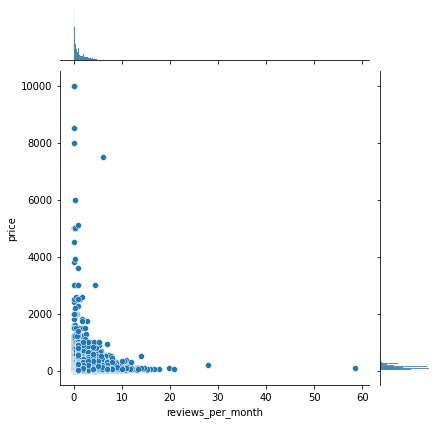

In [ ]:
# 어떤 방법을 쓰셔도 상관없습니다.
# sns.jointplot()

### 문제 6. 수치형 데이터와 Price의 상관성 분석하기

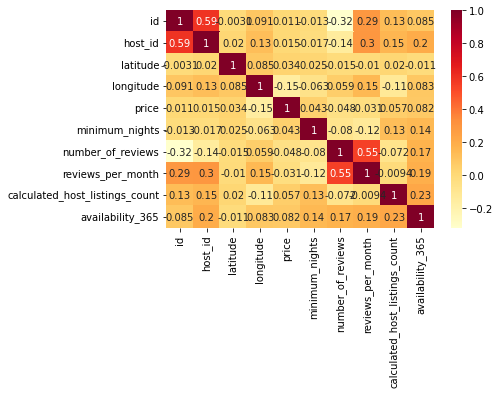

In [ ]:
# sns.heatmap()

### 문제 7. 범주형 데이터와 Price의 Boxplot 계열 및 Histogram 분석하기

In [ ]:
df.columns

####문제 7-1. neighbourhood_group 변수와 price 사이의 분포를 boxplot으로 그려보세요.

In [ ]:
# sns.boxplot()

####문제 7-2. room_type 변수와 price 사이의 분포를 boxplot으로 그려보세요.

In [ ]:
sns.boxplot(x='room_type', y='price', data=df)

## Step 4-1. 데이터 전처리하기

### 문제 8-1. 결측치 처리하기

In [ ]:
# 각 컬럼을 분석하여 미기입/오기입된 데이터 확인하기
# Hint) 수치형 데이터는 통계를 이용해서, 범주형 데이터는 unique(), value_counts()등으로 확인
# fill(), dropna() 등으로 미기입된 데이터를 처리하기
# 결측치는 개인적 판단에 따라 drop하셔도 되고, 특정 값으로 채우셔도 됩니다!



### 문제 8-2. 학습에 필요없는 column이라고 판단된다면 제거하기

In [ ]:
# 'id', 'name', 'host_name', 'latitude', 'longitude' feature를 제거해보세요!
# 각자 판단하여 위 column을 살려서 활용하고, 다른 Column을 제거하셔도 됩니다!
# drop()



### 문제 9. 아웃라이어를 제거하고 통계 재분석하기

In [ ]:
# quantile(), drop() 등 메소드를 이용하여 outlier 제거하고 통계 재분석하기
# 예시 코드를 제공하겠습니다!
# 기본 코드니까 이게 반드시 정답인건 아니고, 이런식으로 파이썬으로 데이터 전처리를 한다 정도로만 보시면 될 것 같아요

In [ ]:
p1 = df['price'].quantile(0.95)
p2 = df['price'].quantile(0.005)
print(p1, p2)

In [ ]:
df = df[(df['price'] < p1) & (df['price'] > p2)]

In [ ]:
df['price'].hist()

## Step 4-2. 데이터 전처리하기 

### 문제 10. get_dummies를 이용한 범주형 데이터 전처리

In [ ]:
# 어떤 column이 범주형이고, 어떤 column이 수치형인지 스스로 판단해보세요
df.columns

In [ ]:
# 예시 코드를 제공하겠습니다.
# 코드 그 자체보다 왜 범주형 데이터를 따로 전처리해줘야하는지에 집중해서 공부하세요!

X_cat = df[['neighbourhood_group', 'neighbourhood', 'room_type']]
X_cat = pd.get_dummies(X_cat)


### 문제 12. StandardScaler를 이용해 수치형 데이터 표준화하기


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# 예시 코드를 제공하겠습니다.
# 마찬가지로 왜 수치형 데이터를 전처리 해줬을지에 대해 생각해보세요!

In [ ]:
# StandardScaler를 이용해 수치형 데이터를 표준화하기
scaler = StandardScaler()
X_num = df.drop(['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 
                 'last_review'], axis=1)

scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)


In [ ]:
# 범주형 데이터와 수치형 데이터를 단순히 합치는 작업
X = pd.concat([X_scaled, X_cat], axis=1)

# target 변수인 y를 지정해준 작업
y = df['price']

### 문제 13. 학습데이터와 테스트데이터 분리하기


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# train_test_split() 함수로 학습 데이터와 테스트 데이터 분리하기
X_train, X_test, y_train, y_test = 

## Step 5. 모델 선택 및 Train

### 문제 14. Regression 모델 종류에 대해 검색해보고 하나 선택하기

In [ ]:
# 아직 모델에 대해 배우지 않았기 때문에 크게 신경쓰지 않으셔도 됩니다!
# 단지 '모델 선택 및 Train 단계가 있다.'라는걸 배우기 위한 과정입니다.
# 기존에 알고 계시는 어떤 모델을 사용하셔도 상관없습니다.
# 기존에 알고 계신 모델이 하나도 없다면 구글링 후 하나 선택하시면 됩니다.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model_reg = RandomForestRegressor()




### 문제 15. 선택한 모델 구현 및 데이터 학습 시키기

### 문제 16. 모델 학습 결과 평가하기

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
# Predict를 수행하고 mean_absolute_error, mse 결과 출력하기
pred = 





## Step 6. 초기 모델을 발전시키며 모델 수정


### 문제 17. 실제 값과 추측 값의 Scatter plot 시각화하기


In [ ]:
# y_test vs. pred Scatter 플랏으로 시각적으로 분석하기
# 예시 코드를 드리겠습니다.
# 학습 이후 이런식으로 모델의 결과를 살펴보는구나... 정도의 큰 흐름을 중심으로 이해해주세요

plt.scatter(x=y_test, y=pred, alpha=0.1)
plt.plot([0,350], [0, 350], 'r-')

### 문제 18. 에러 값의 히스토그램 확인하기


In [ ]:
# 예시코드를 제공하겠습니다.
# 위와 마찬가지로 큰흐름을 이해하는걸 목적으로 해주세요.
# 지금 단계에서 세부 함수나 코드를 모른다고해서 스트레스 받으실 필요 전혀 없습니다.

In [ ]:
# err의 히스토그램으로 에러율 히스토그램 확인하기
err = (pred - y_test) / y_test
sns.histplot(err)
plt.grid()

In [ ]:
# err의 히스토그램으로 에러 히스토그램 확인하기
err = pred - y_test
sns.histplot(err)
plt.grid()

# 마무리

## 과제 마무리

고생하셨습니다!

여러번 강조했지만 오늘 과제는 세부적인 함수보다는 기계가 어떻게 학습하는지 그 과정과 흐름을 익히시는데 초점을 맞추시면 됩니다.

흐름에 대해 이해한 후 코드와 문법에 대해서 스스로 공부하시면 됩니다.

오늘 쓰인 라이브러리나 method, 함수들은 어차피 계속 만나게될거라 방학때 복습해놓는게 나중에도 편해요!

-


## 분반을 시작하면서




**머신러닝 분반을 준비하면서 알려드려야할게 많은데, 주어진 2달의 기간이 너무나도 짧습니다.**

-



수리적 이해가 무엇보다 중요해서 정규 세션에서는 수학을 위주로 전달되긴하지만,

**초심자 입장에서 직관적인 이해, 실무적인 코딩이 더 도움된다는것도 겪어봐서 잘 알고있습니다**

-



그래서 마음같아서는 주 2~3회 세션을 잡아서 수리적 이해와 실무적 코딩, 직관적 이해를 모두 전달해드리고 싶지만, 여러분이 학회 활동만 하지 않는다는걸 알고있어요...

-

방학이 지나고 학기가 시작되면 17기 여러분들도 학회내에서 프로젝트를 진행하게 됩니다. 

목요일 정규 세션에서 실무적인 코딩을 집중적으로 다루지않는만큼, 학기가 시작되었을때 헤매지않게 과제는 오늘처럼 코딩 위주로 내어드릴 생각입니다.

-

머신러닝을 처음 접하신분들은 처음보는 함수와 파이썬 문법 앞에서 헤매는게 지극히 정상적이고 당연한 현상입니다.

궁금한게 생기시면 언제든 연락주세요!

